In [42]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import fiona
from shapely.geometry import Polygon

field_plot=Polygon([(-91.434, 33.442),(-91.435, 33.444),(-91.438, 33.444),(-91.438,33.442)])
shapefile_src = 'soilmu_a_ar017.shp'
excelfile_src = 'AR017_soils.xlsx'
geom_list = []

def excel_reader():
    mukey_clay_dict={}
    mukey_clay_df = pd.read_excel(excelfile_src)
    mukey_clay_df = mukey_clay_df.reset_index()
    for index, row in mukey_clay_df.iterrows():
        mukey_clay_dict[str(int(row['mukey']))]=row['clay%_mu']
    return mukey_clay_dict

def mukey_field_intersection():
    src = fiona.open(shapefile_src)
    keep_columns = ['MUKEY', 'GEOMETRY']
    output_schema = src.schema.copy()
    output_schema['properties'] = {column_name: typ for column_name, typ in output_schema['properties'].items() if column_name in keep_columns}

    mukey_list=[]
    
    for feature in src:
        feature_poly = Polygon(feature['geometry']['coordinates'][0])
        if field_plot.intersects(feature_poly):
            feature['properties'] = {column_name: value for column_name, value in feature['properties'].items() if column_name in keep_columns}
            mukey_list.append([feature['properties']['MUKEY'],field_plot.intersection(feature_poly).area/field_plot.area])
    return mukey_list


def calculator():
    spatial_data = mukey_field_intersection()
    tabular_data = excel_reader()
    clay_prc = 0

    for item in spatial_data:
        clay_prc += item[1]*tabular_data[item[0]]
    return round(clay_prc, 2)
print (calculator())

33.33


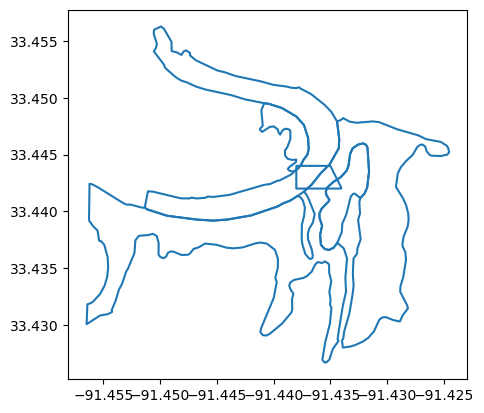

In [41]:
poly1 = Polygon(geom_list[0])
poly2 = Polygon(geom_list[1])
poly3 = Polygon(geom_list[2])
poly4 = Polygon(geom_list[3])

myPoly = gpd.GeoSeries([poly1,poly2,poly3,poly4,field_plot])
myPoly.boundary.plot()
plt.show()